# Project 1 – Group 34
## Dataset: Heart Failure Clinical Records
**Source:** [UCI Machine Learning Repository](https://doi.org/10.24432/C5Z89R)
 
> This dataset contains the medical records of 299 patients who experienced heart failure, collected during their follow-up period. Each patient profile includes 13 clinical features.

In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

# Plotting style
sns.set_style('darkgrid')
sns.set_theme(font_scale=1.)

Load data set and and split into the standard format(X,y),
Explanation of the data set:

$y$ is the target variable: **DEATH_EVENT** (binary indicator of patient death)

### Feature Description
| Feature                   | Type       | Description                                               | Unit                | Missing Values |
|---------------------------|------------|-----------------------------------------------------------|---------------------|---------------|
| age                       | Integer    | Age of the patient                                        | years               | no            |
| anaemia                   | Binary     | Decrease of red blood cells or hemoglobin                 | —                   | no            |
| creatinine_phosphokinase  | Integer    | Level of the CPK enzyme in the blood                      | mcg/L               | no            |
| diabetes                  | Binary     | If the patient has diabetes                               | —                   | no            |
| ejection_fraction         | Integer    | Percentage of blood leaving the heart at each contraction | %                   | no            |
| high_blood_pressure       | Binary     | If the patient has hypertension                           | —                   | no            |
| platelets                 | Continuous | Platelets in the blood                                    | kiloplatelets/mL    | no            |
| serum_creatinine          | Continuous | Level of serum creatinine in the blood                    | mg/dL               | no            |
| serum_sodium              | Integer    | Level of serum sodium in the blood                        | mEq/L               | no            |
| sex                       | Binary     | Sex (woman or man)                                        | —                   | no            |
| smoking                   | Binary     | If the patient smokes or not                              | —                   | no            |
| time                      | Integer    | Follow-up period                                          | days                | no            |
| death_event               | Binary     | If the patient died during the follow-up period           | —                   | no            |

In [6]:
df = pd.read_csv('../02452_Group34_Project1/data/heart_failure_clinical_records_dataset.csv')

X = df.drop(columns=['DEATH_EVENT'])         # Features without target
y = pd.Categorical(df['DEATH_EVENT'])        # Target as categorical

# Check the shape of the data
N, M = X.shape
assert N == 299, "There should be 299 samples in the Heart Failure dataset."
assert M == 12, "There should be 12 features in the Heart Failure dataset(13 together - target)"

# Display the first few rows of the dataframe
display(X.head())
display(y[:5])

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


[1, 1, 1, 1, 1]
Categories (2, int64): [0, 1]

Check for missing vallues and outliers

Missing values per column:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


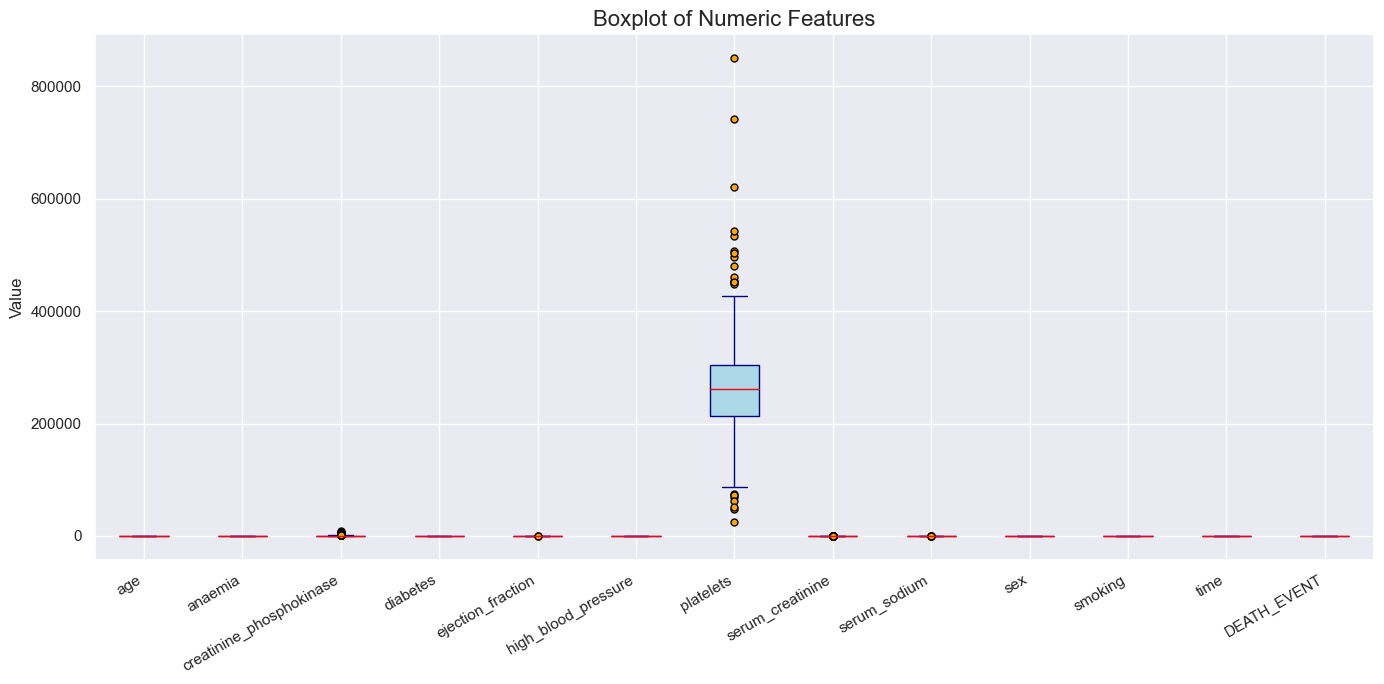

In [53]:
print("Missing values per column:")
print(df.isnull().sum())

plt.figure(figsize=(14,7))
box = df.boxplot(patch_artist=True,
                              boxprops=dict(facecolor='lightblue', color='navy'),
                              medianprops=dict(color='red'),
                              whiskerprops=dict(color='navy'),
                              capprops=dict(color='navy'),
                              flierprops=dict(markerfacecolor='orange', marker='o', markersize=5))
plt.title("Boxplot of Numeric Features", fontsize=16)
plt.ylabel("Value", fontsize=12)
plt.xticks(rotation=30, ha='right', fontsize=11)
plt.tight_layout()
plt.show()

We can see there are no missing vallues, but there might be some outliers based on the box plot. We need to do subplots of all to determine that

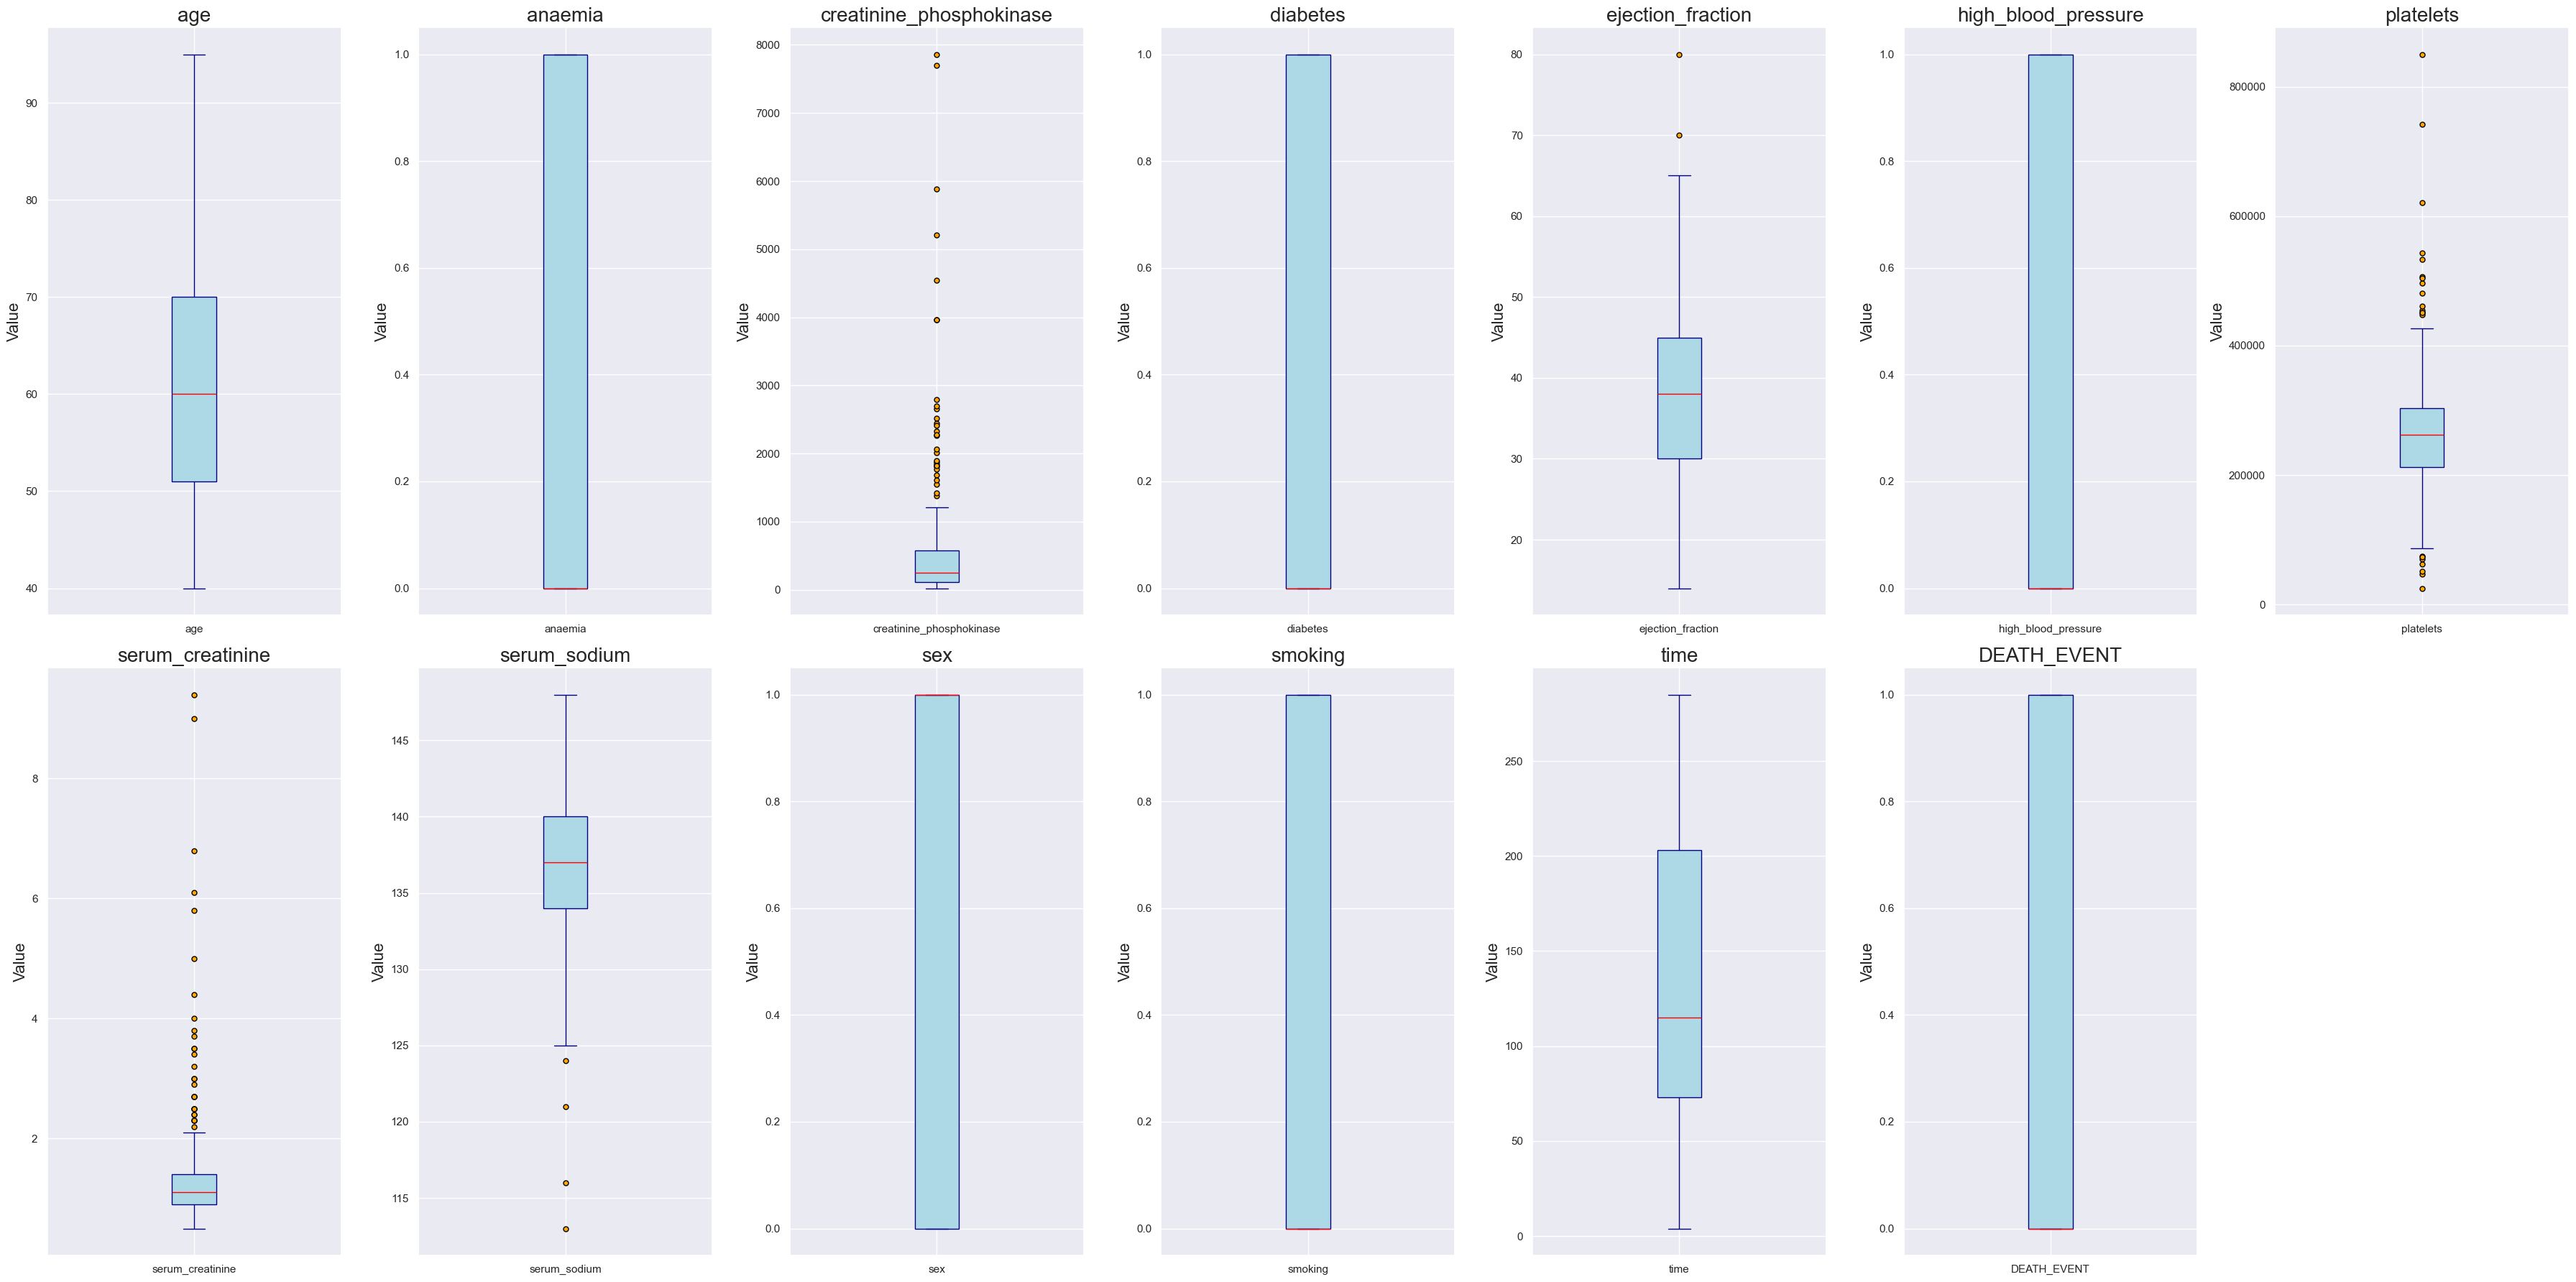

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=int(np.ceil(len(df.columns)/2)), figsize=(36, 18))  # Much larger size
axes = axes.flatten()

for i, col in enumerate(df.columns):
    df.boxplot(column=col, ax=axes[i], patch_artist=True,
               boxprops=dict(facecolor='lightblue', color='navy'),
               medianprops=dict(color='red'),
               whiskerprops=dict(color='navy'),
               capprops=dict(color='navy'),
               flierprops=dict(markerfacecolor='orange', marker='o', markersize=5))
    axes[i].set_title(col, fontsize=20)
    axes[i].set_ylabel("Value", fontsize=16)

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

We can see in many of the numeric features there might be outliers fx ejection_fraction we see 2 vallues that are out of the scale for the rest of the values 